## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.8.2
- 성명 : 신인철
- 점수 :

Q1. 표준 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(-3,3,0.1) 

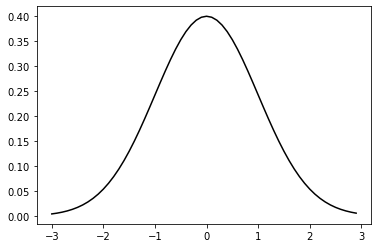

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.arange(-3,3,0.1)

plt.plot(x,stats.norm.pdf(x=x),color='k')

Q2. 표준 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,3,0.1)

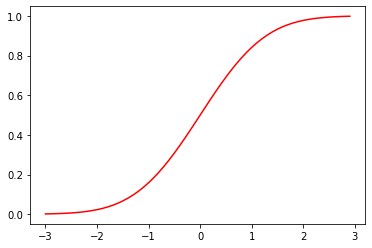

In [3]:
plt.plot(x,stats.norm.cdf(x=x),color='red')

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 B, A로 변경하세요.
- df2의 length를 species가 A인 것은 2배로 B인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [4]:
import pandas as pd

df1 = pd.read_csv('dataset/5_2_fm.csv')
df2 = df1.copy()
df2.species.replace({'A':'B','B':'A'},inplace=True)
print(df1)
print(df2)


  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10
  species  length
0       B       2
1       B       3
2       B       4
3       A       6
4       A       8
5       A      10


In [5]:
df2.loc[(df2['species'] == 'A'),'length'] = df2.length * 2
df2.loc[(df2['species'] == 'B'),'length'] = df2.length * 3
df = pd.concat([df1,df2],axis=0)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,B,6
1,B,9
2,B,12
3,A,12


In [6]:
print(df.groupby(['species']).mean())
print(df.groupby(['species']).std())

         length
species        
A           9.5
B           8.5
           length
species          
A        7.582875
B        2.345208


Q4.평균 4, 표준편차 0.8인 정규분포에서 아래작업을 수행하세요.
- 확률밀도함수에서 x 값이 3 이하가 되는 비율을 구하세요
- 누적분포함수에서 확률변수가 4 이하가 되는 확률을 구하세요

In [7]:
pdf = stats.norm.pdf(loc=4,scale=0.4,x=3)
cdf = stats.norm.cdf(loc=4,scale=0.4,x=4)
print(pdf)
print(cdf)

0.043820751233921346
0.5


Q5. x축이 x = np.arange(start = -5, stop = 5.1, step = 0.01)이라고 할 때 다음을
수행하세요.
- 표준정규분포 그래프
- 자유도 9인 t분포 그래프
- 자유도 5인 t분포 그래프

Text(0.5, 1.0, '자유도 5인 T분포 그래프')

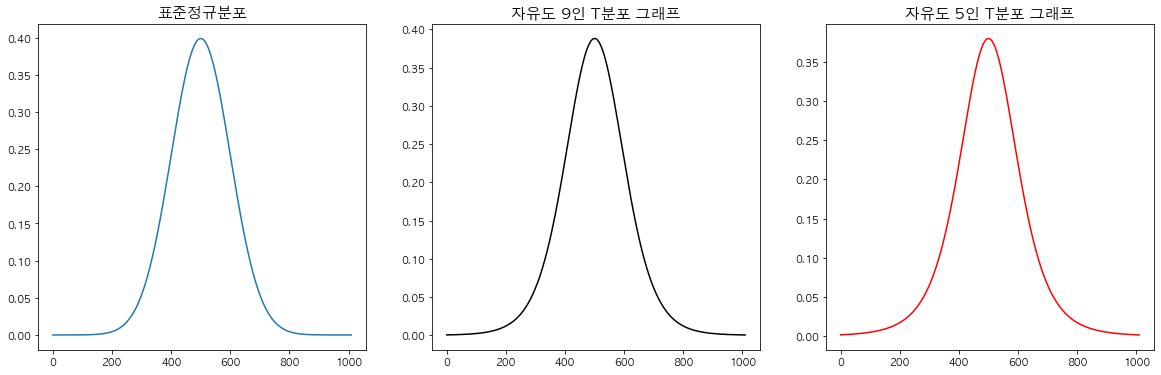

In [14]:
from matplotlib import rc

rc('font',family='AppleGothic') #한글 폰트 설정
x=np.arange(-5,5.1,0.01)
pdf = stats.norm.pdf(x=x)
pdf9 = stats.t.pdf(x=x,df=9)
pdf5 = stats.t.pdf(x=x,df=5)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(pdf)
plt.title('표준정규분포',size=15)
plt.subplot(1,3,2)
plt.plot(pdf9,color='black')
plt.title('자유도 9인 T분포 그래프',size=15)
plt.subplot(1,3,3)
plt.plot(pdf5,color='red')
plt.title('자유도 5인 T분포 그래프',size=15)


Q6. 'dataset/titanic3.csv'을 불러와서 sex 와 embarked 칼럼을 각각 인덱스, 컬럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요. (단 embarked 컬럼의 null 값을 앞에 있는 값으로 대체 처리 선행)

In [9]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

titanic.embarked = titanic.embarked.fillna(method='ffill')
titanic.embarked.isnull().sum()

0

In [10]:
sns.heatmap(titanic.pivot_table(index='sex',columns='embarked',values='survived',aggfunc='mean'),annot=True,cbar=True,fmt='f')


NameError: name 'sns' is not defined

Q7. 주어진 3행 3열 배열의 역행렬을 구하고 검증하세요. (검증은 항등행렬을 출력)

In [ ]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt2 = np.linalg.inv(mt1)

np.dot(mt1,mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [ ]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 12
fish_multi.iloc[10,1] = 12
fish_multi.iloc[12,1] = 1
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      12
6        A       4
7        A       5
8        A       5
9        A       6
10       B      12
11       B       6
12       B       1
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


5    12
Name: length, dtype: int64
10    12
12     1
Name: length, dtype: int64


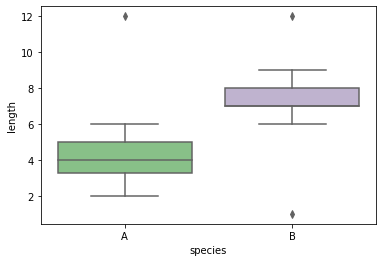

In [ ]:
import seaborn as sns
sns.boxplot(x='species',y='length',data=fish_multi,palette='Accent')

def wow(a):
    q1, q3 = np.percentile(a,[25,75])
    iqr = q3 - q1

    return a[((a <= (q1 - 1.5 * iqr))|(a >= (q3 + 1.5 * iqr)))]

a = wow(fish_multi.groupby(['species']).get_group('A')['length'])
b = wow(fish_multi.groupby(['species']).get_group('B')['length'])
print(a)
print(b)

In [ ]:
rein = fish_multi[(((fish_multi['length'] == 12) & (fish_multi['species'] == 'A')) | ((fish_multi['length'] == 1) | (fish_multi['length'] == 12)) & (fish_multi['species'] == 'B'))].index
fish_multi.drop(rein,axis=0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  17 non-null     object
 1   length   17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes


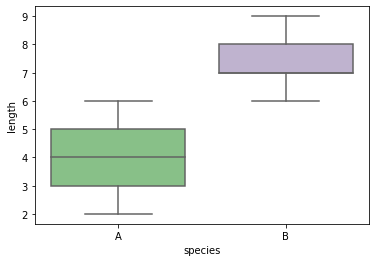

In [ ]:
sns.boxplot(x='species',y='length',data=fish_multi,palette='Accent')
fish_multi.info()

<AxesSubplot:xlabel='species', ylabel='length'>

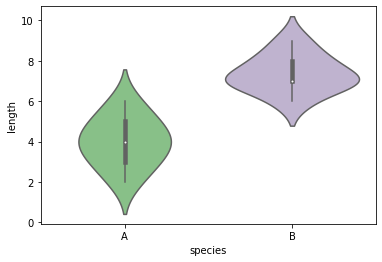

In [ ]:
sns.violinplot(x='species',y='length',data=fish_multi,palette='Accent')

Q9. df_auto mpg 컬럼과 horsepower 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
하나의 그래프로 표현하여 탐색 후 인사이트를 기술하세요.

In [ ]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


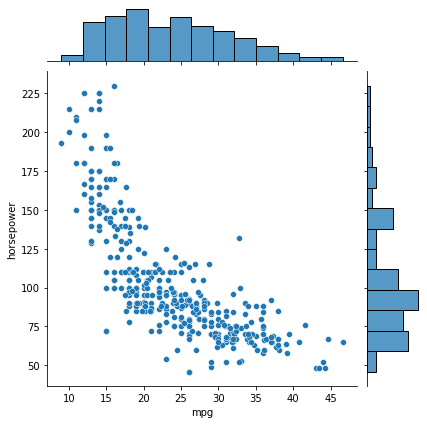

In [ ]:
df_auto.horsepower.replace('?',np.nan,inplace=True)
df_auto.horsepower.dropna(inplace=True)
sns.jointplot(x='mpg',y='horsepower',data=df_auto)

# 마력과 연비는 반 비례한다(음의 상관관계)
# 100마력과 75마력 사이에 여러 차종이 많이 분포해 있다


Q10. FIFA 데이터셋을 불러와서 다음 사항을 수행하세요.
- 각 선수의 키는 Height변수에 피트와 인치로 입력되어 있습니다. 
이를 cm로 변환하여 새로운 변수 Height_cm을 생성하고 통계요약표를 구하세요
( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)
- 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,“Defender”, “GoalKeeper”로 재범주화하고, 변환하여 Position_Class 라는 변수를 생성하고 각 그룹별 평균을 구하세요.
    - Forward : ['LS','ST','RS','LW','LF','CF','RF','RW']
    - Midfielder : ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
    - Defender : ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
    - GoalKeeper

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./dataset/FIFA.csv',engine='python',encoding='euc-kr')
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [ ]:
def tran(a):
    h,i = map(int,a.split("\'"))
    result = (h * 30) + (i * 2.5)
    return result

data['Height_cm'] = data.Height.apply(tran)
data.Height_cm.describe()

count    16642.000000
mean       178.393973
std          6.606026
min        152.500000
25%        172.500000
50%        177.500000
75%        182.500000
max        202.500000
Name: Height_cm, dtype: float64

In [ ]:
def pos(a):
    Forward = ['LS','ST','RS','LW','LF','CF','RF','RW']
    Midfielder = ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
    Defender = ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
    if a in Forward:
        posotion = 'Forward'
    elif a in Midfielder:
        posotion = 'Midfielder'
    elif a in Defender:
        posotion = 'Defender'
    else :
        posotion = 'Goalkeeper'
    return posotion

data['Position_Class'] = data.Position.apply(pos)
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,Goalkeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder


In [ ]:
data.groupby('Position_Class').mean()

,ID,Age,Overall,Jersey_Number,Contract_Valid_Until,Weight_lb,Release_Clause,Value,Wage,Height_cm
Position_Class,,,,,,,,,,
Defender,213137.403918,25.633318,66.559145,17.814715,2020.227157,167.857335,3958.556303,2104.697174,9.377449,179.325931
Forward,215679.094941,24.783509,66.254599,22.101183,2020.302891,165.743758,5670.227332,3035.026281,11.448095,177.945959
Goalkeeper,207972.827429,26.070344,64.531883,20.468623,2020.119939,179.904352,3032.167004,1616.634615,6.800101,184.822874
Midfielder,216027.369605,24.608105,66.220061,20.323404,2020.270922,158.034043,5386.012158,2865.531915,9.944681,174.833333
